<a href="https://colab.research.google.com/github/franov/r/blob/main/NPS_e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Práctico Net Promoter Score (NPS)

## Preparación de datos

### Instalación de dependencia de paquetes y carga de librerías

In [1]:
# Instalación de paquetes
devtools::install_github("brendan-r/NPS") # install.packages("NPS")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("janitor")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpJj3Bgs/remotes1767d9b7747/brendan-r-NPS-cd9473e/DESCRIPTION’ ... OK
* preparing ‘NPS’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘NPS_2.0.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘stringr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [2]:
# Carga de librerías
library(NPS)
library(ggplot2)
library(tidyr)
library(janitor)

Welcome to NPS 2.0.999!
Bug reports: https://github.com/brendan-r/NPS/issues

'Breaking' API changes since version 1.x: See ?npsv2 for a summary.

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Carga y limpieza de datos

In [3]:
# Importamos los datos desde el archivo plano CSV (2579 registros)
datos <- read.csv("nps.csv")
datos

X,Response.ID,Response.Status,TotalAmount,AmountPerGift,PledgeFrequency,SourceType,PlgUserGroup,How.long.Listening,Age,Gender,How.long.Listening.Code,Age.Code,NPS.Score,Monthly.Equiv
<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
0,11706300,Complete,20,20,O,Phone,INFOCISION,Less than 6 months,25-34,Female,1,3,10,1.6666667
1,11706302,Complete,600,50,M,Phone,INFOCISION,1 year to less than 3 years,25-34,Female,3,3,10,50.0000000
2,11706307,Complete,20,20,O,Phone,INFOCISION,6 months to less than a year,35-44,Female,2,4,10,1.6666667
3,11706312,Complete,20,20,O,Phone,INFOCISION,Less than 6 months,35-44,Female,1,4,10,1.6666667
4,11706316,Complete,40,40,O,Phone,INFOCISION,6 months to less than a year,25-34,Male,2,3,10,3.3333333
5,11706318,Complete,10,10,O,Web,WEB,5 years to less than 10 years,35-44,Female,5,4,10,0.8333333
6,11706335,Complete,240,20,M,Phone,STAFF,3 years to less than 5 years,25-34,Female,4,3,8,20.0000000
7,11706368,Complete,120,10,M,Phone,INFOCISION,6 months to less than a year,18-24,Female,2,2,10,10.0000000
8,11706376,Complete,60,60,O,Web,WEB,3 years to less than 5 years,45-54,Male,4,5,9,5.0000000


In [4]:
# Ordenamos y simplificamos los nombres para que puedan ser utilizados con mayor facilidad
datos <- clean_names(datos)

In [5]:
datos

x,response_id,response_status,total_amount,amount_per_gift,pledge_frequency,source_type,plg_user_group,how_long_listening,age,gender,how_long_listening_code,age_code,nps_score,monthly_equiv
<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
0,11706300,Complete,20,20,O,Phone,INFOCISION,Less than 6 months,25-34,Female,1,3,10,1.6666667
1,11706302,Complete,600,50,M,Phone,INFOCISION,1 year to less than 3 years,25-34,Female,3,3,10,50.0000000
2,11706307,Complete,20,20,O,Phone,INFOCISION,6 months to less than a year,35-44,Female,2,4,10,1.6666667
3,11706312,Complete,20,20,O,Phone,INFOCISION,Less than 6 months,35-44,Female,1,4,10,1.6666667
4,11706316,Complete,40,40,O,Phone,INFOCISION,6 months to less than a year,25-34,Male,2,3,10,3.3333333
5,11706318,Complete,10,10,O,Web,WEB,5 years to less than 10 years,35-44,Female,5,4,10,0.8333333
6,11706335,Complete,240,20,M,Phone,STAFF,3 years to less than 5 years,25-34,Female,4,3,8,20.0000000
7,11706368,Complete,120,10,M,Phone,INFOCISION,6 months to less than a year,18-24,Female,2,2,10,10.0000000
8,11706376,Complete,60,60,O,Web,WEB,3 years to less than 5 years,45-54,Male,4,5,9,5.0000000


## Análisis de datos



### Análisis general del estado de los datos

In [6]:
# Agregamos una columna calculada a partir de la columna NPS Score.
# El objetivo es determinar si los clientes son promotores, detractores o pasivos
datos$cat <- cut(datos$nps_score, 
                breaks = c(-1, 6, 8, 10), 
                labels = c("Detractor", "Passive", "Promoter"))

In [7]:
# Chequeamos en general el estado de los datos
summary(datos)

       x           response_id       response_status     total_amount   
 Min.   :   0.0   Min.   :11706300   Length:2579        Min.   :   1.0  
 1st Qu.: 644.5   1st Qu.:12013070   Class :character   1st Qu.: 120.0  
 Median :1289.0   Median :12207363   Mode  :character   Median : 240.0  
 Mean   :1289.0   Mean   :12271973                      Mean   : 309.7  
 3rd Qu.:1933.5   3rd Qu.:12528042                      3rd Qu.: 480.0  
 Max.   :2578.0   Max.   :13777359                      Max.   :5000.0  
                                                                        
 amount_per_gift   pledge_frequency   source_type        plg_user_group    
 Min.   :   1.00   Length:2579        Length:2579        Length:2579       
 1st Qu.:  15.00   Class :character   Class :character   Class :character  
 Median :  25.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  56.58                                                           
 3rd Qu.:  40.00                    

### Preguntas a resolver

#### Pregunta 1: ¿Qué podemos observar de los datos?

In [8]:
# Luego de verificar los datos, quitamos aquellos en los cuales el NPS Score es
# vacío o -1
datos <- with(datos, 
             datos[!(nps_score == -1 | is.na(nps_score)), ])

In [9]:
# Quitamos aquellas filas reemplazando el dataset (2281 registros)
datos <- datos %>% drop_na(cat)

##### Preparando el cálculo para el NPS

In [10]:
# Verificando la frecuencia de los datos, en base a la columna NPS Score
# Frequency table
prop.table(table(datos$nps_score))


           0            1            2            3            4            5 
0.0013152126 0.0017536168 0.0004384042 0.0008768084 0.0008768084 0.0065760631 
           6            7            8            9           10 
0.0065760631 0.0179745726 0.0517316966 0.0670758439 0.8448049101 

In [11]:
# A manera de clarificar el estado, lo hacemos en términos de promotores, 
# detractores o pasivos
summary(npc(datos$nps_score))

Detractor   Passive  Promoter 
       42       159      2080

In [12]:
# Y generamos una tabla para representar los datos en base a las calificaciones
table(datos$nps_score, npc(datos$nps_score))

    
     Detractor Passive Promoter
  0          3       0        0
  1          4       0        0
  2          1       0        0
  3          2       0        0
  4          2       0        0
  5         15       0        0
  6         15       0        0
  7          0      41        0
  8          0     118        0
  9          0       0      153
  10         0       0     1927

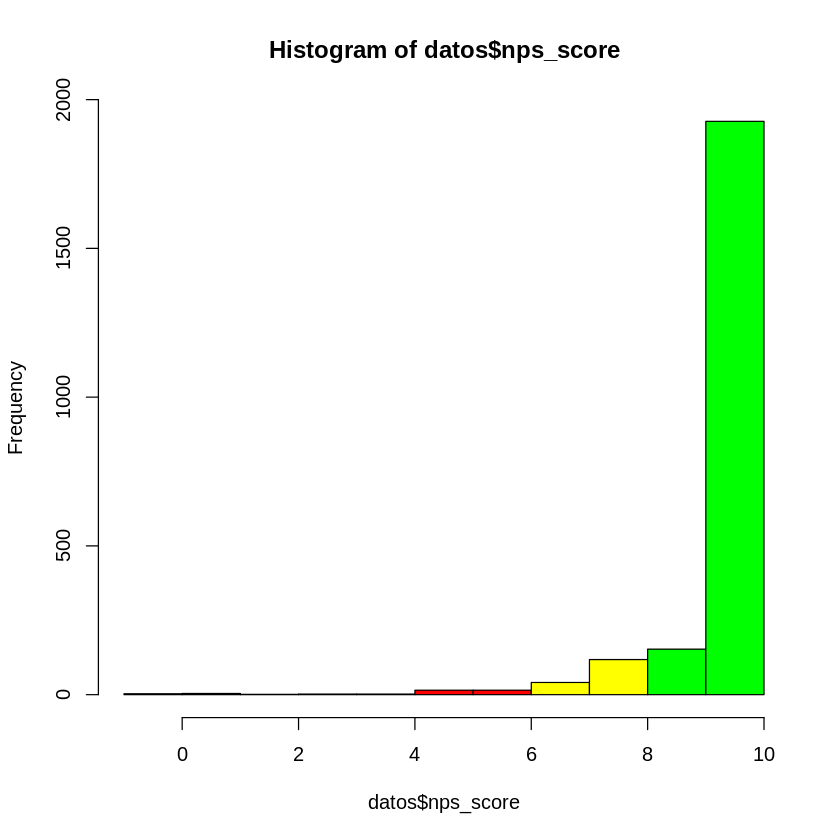

In [13]:
# Gráficamente en un histograma
hist(datos$nps_score, 
     breaks=-1:10, col=c(rep("red",7), 
                         rep("yellow",2), 
                         rep("green", 2)))


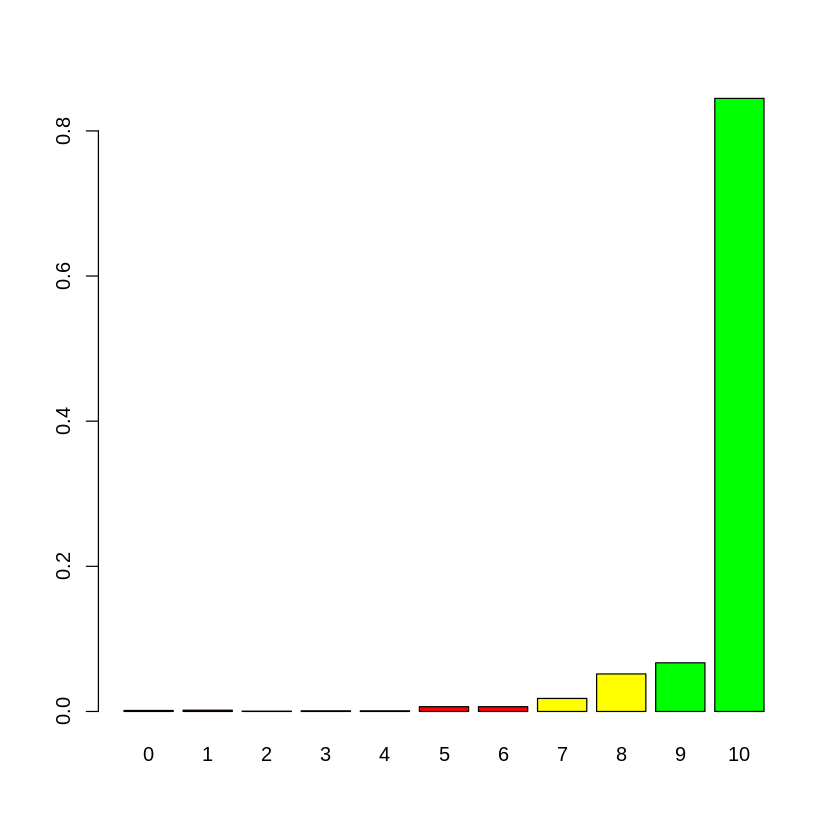

In [14]:
# Otra opción en un gráfico de barras
barplot(prop.table(table(datos$nps_score)),
        col=c(rep("red",7), 
              rep("yellow",2), 
              rep("green", 2)))

#### Pregunta 2: ¿Qué pudes observar cuando analizamos las edades?

In [15]:
# Análisis por grupo etario agregando los datos
edades <- aggregate(datos$nps_score, list(datos$age), FUN= mean)

In [16]:
edades$Group.1 <- factor(edades$Group.1, 
                         levels = c("18-24",
                                    "25-34",
                                    "35-44",
                                    "45-54",
                                    "55-64",
                                    "65-74",
                                    "75+"))

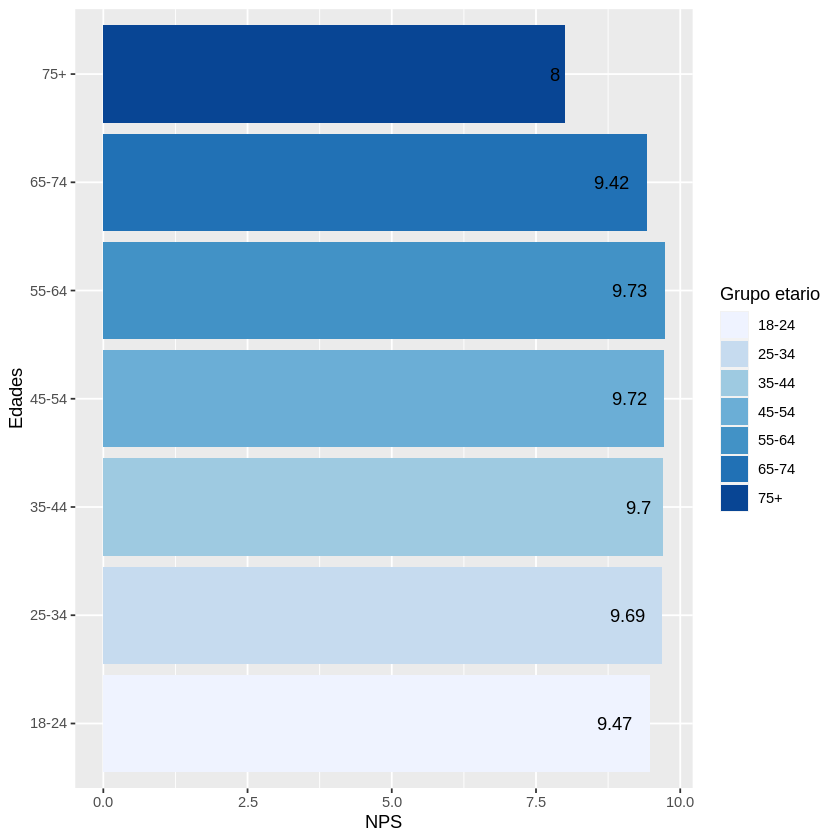

In [26]:
# Analizamos los datos por edad
ggplot(edades) + geom_col(aes(x=as.factor(Group.1), y=x, fill= as.factor(Group.1)))  + xlab("Edades") + ylab("NPS") + geom_text(aes(x=as.factor(Group.1), y=x, label=round(x,2)), vjust = 0.5, hjust = 1.5) + coord_flip() + scale_fill_brewer("Grupo etario")


In [18]:
# Cálculo del NPS general
nps(datos$nps_score)

[1] 0.8934678

In [19]:
# Error estándar (Standard error)
nps_se(datos$nps_score)

[1] 0.007607452

In [20]:
# Varianza
nps_var(datos$nps_score)

[1] 0.1320091

## Pregunta 3: ¿Es mi muestra lo suficientemente grande?
¿Es significativa esta fluctuación en las puntuaciones de NPS?

In [56]:
nps_test_(datos$nps_score, y = NULL, test = "wald", conf = 0.95, pseudo_observations = c(0.75, 1.5, 0.75))

One sample Net Promoter Score Z test

NPS of x: 0 (n = 22063)

Standard error of x: 0 
Confidence level: 0.95 
p value: 1 
Confidence interval: -0.0003972817 0.0003972817 


Para responder a estas preguntas, ejecutamos la prueba Wald que nos permite medir la significancia del NPS.

In [83]:
nps_test_(datos$nps_score, y = NULL, test = "wald", conf = 0.95)

One sample Net Promoter Score Z test

NPS of x: 0 (n = 22063)

Standard error of x: 0 
Confidence level: 0.95 
p value: 1 
Confidence interval: -0.0003972817 0.0003972817 


*One sample Net Promoter Score Z test*

*NPS of x: 0.89 (n = 2281)*

*Standard error of x: 0.008*

*Confidence level: 0.95*

*p value: 0*

*Confidence interval: 0.9083781 0.8785574*

In [67]:
install.packages("aod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [78]:
# Cargar el paquete aod
library(aod)

In [81]:
datos$nps_score <- ifelse(datos$nps_score < 0, 0, datos$nps_score)
datos$nps_score <- ifelse(datos$nps_score > 10, 10, datos$nps_score)

In [91]:
datos$nps_score <- as.numeric(datos$nps_score)

In [110]:
datos$nps_score <- factor(ifelse(datos$nps_score >= 9, "promotor", ifelse(datos$nps_score >= 7, "pasivo", "detractor")))

# Ajustar el modelo de regresión logística
modelo <- glm(nps_score ~ 1, data = datos, family = binomial)


In [120]:
# Realizar el test Wald para el coeficiente del NPS
test_wald <- wald.test(b = matrix(coef(modelo), ncol = 1), Sigma = vcov(modelo), Terms = 1:1)

In [112]:
# Imprimir los resultados del test
print(test_wald)

Wald test:
----------

Chi-squared test:
X2 = 651.9, df = 1, P(> X2) = 0.0


In [113]:
# Calcular el valor NPS
NPS <- round((mean(datos$nps_score == "promotor") - mean(datos$nps_score == "detractor")) * 100)
print(NPS)

[1] 89


#Conclusión
El resultado del test Wald que indica que el estadístico de prueba Chi-cuadrado es 651.9 con un grado de libertad (df) de 1 y un p-valor de 0.0.

El p-valor es la probabilidad de que el resultado observado o uno más extremo se obtenga si la hipótesis nula es verdadera. En este caso, como el p-valor es muy cercano a cero, se puede concluir que el coeficiente de NPS es significativamente diferente de cero. En otras palabras, podemos rechazar la hipótesis nula de que el coeficiente de NPS es igual a cero, **lo que indica que NPS tiene un efecto significativo en la variable de respuesta**.

El valor de Chi-cuadrado y el grado de libertad se utilizan para calcular el p-valor del test. En general, un valor alto de Chi-cuadrado y un bajo valor de p-valor indican una fuerte evidencia en contra de la hipótesis nula. En este caso, el valor de Chi-cuadrado es bastante alto, lo que sugiere que hay una fuerte evidencia para rechazar la hipótesis nula.

En resumen, el resultado del test Wald sugiere que el coeficiente de NPS es significativamente diferente de cero y tiene un efecto significativo en la variable de respuesta.